<a href="https://colab.research.google.com/github/memona008/Deep-Learning-Notebooks/blob/master/Face_Detection_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Detection & Recognition

In [ ]:
pip install face_recognition

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import face_recognition
import os
import numpy as np
import math


In [ ]:
def draw_bounding_boxes(face_locations, frame):
  for (top, right, bottom, left) in face_locations:
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.putText(frame,'', (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
  return frame


def draw_bounding_boxes_with_names(face_locations, face_names, frame):
  for (top, right, bottom, left), name in zip(face_locations, face_names):
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.4, (255, 255, 255), 1)
  return frame

In [ ]:
!unzip "/content/drive/My Drive/Datasets/FaceDataSet.zip"

In [ ]:
def prepare_known_dataset(datasetlink):
  encodings_list = []
  names_list = []
  directory = datasetlink
  for folder in os.listdir(directory):
    folder_path = os.path.join(directory,folder)
    for file in os.listdir(folder_path):
      file_path = os.path.join(folder_path,file)
      image = face_recognition.load_image_file(file_path)
      encoding = face_recognition.face_encodings(image)
      if len(encoding) > 0:
        encodings_list.append(encoding[0])
        names_list.append(str(folder))

  return encodings_list, names_list


In [ ]:
def test_recognition(testlink, encodings_list, names_list):
  recognized_frames = []
  face_locations_found = []
  face_names_found = []
  for file in os.listdir(testlink):
    if file.endswith('jpg'):
      test_image = frame = face_recognition.load_image_file("{0}{1}".format(testlink,file))

      # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
      rgb_small_frame = test_image[:, :, ::-1]

      face_locations_found = face_recognition.face_locations(rgb_small_frame,model='cnn')
      print("{0} faces detected in {1}".format(len(face_locations_found),file))
      face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations_found)
      face_names_found = []
      for face_encoding in face_encodings:
          matches = face_recognition.compare_faces(encodings_list, face_encoding, 0.529)
          name = "Unknown"

          face_distances = face_recognition.face_distance(encodings_list, face_encoding)
          best_match_index = np.argmin(face_distances)
          if matches[best_match_index]:
              name = names_list[best_match_index]

          face_names_found.append(name)

      recognized_frames.append(draw_bounding_boxes_with_names(face_locations_found,face_names_found, test_image))

    else:
      continue

  return recognized_frames


In [ ]:
known_encodings, known_names = prepare_known_dataset('/content/FaceDataSet')

In [ ]:
recognized_frames = test_recognition('/content/',known_encodings, known_names)

4 faces detected in test_1.jpg
7 faces detected in sample.jpg
2 faces detected in test_5.jpg
2 faces detected in test_3.jpg
2 faces detected in test_2.jpg


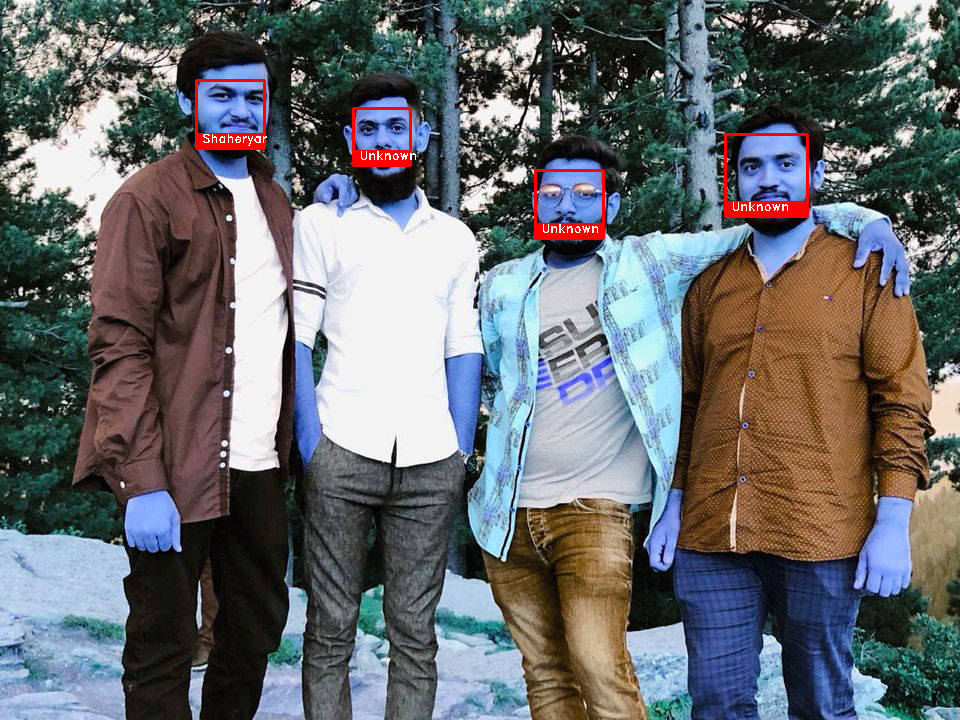

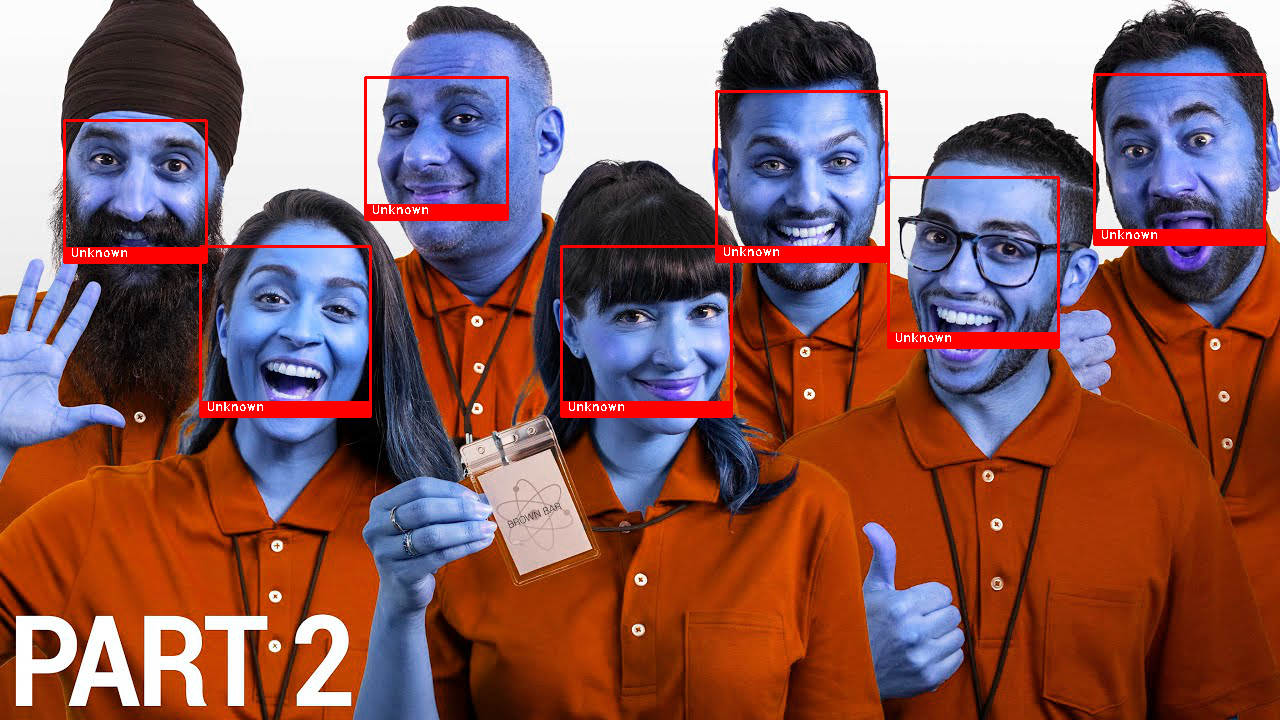

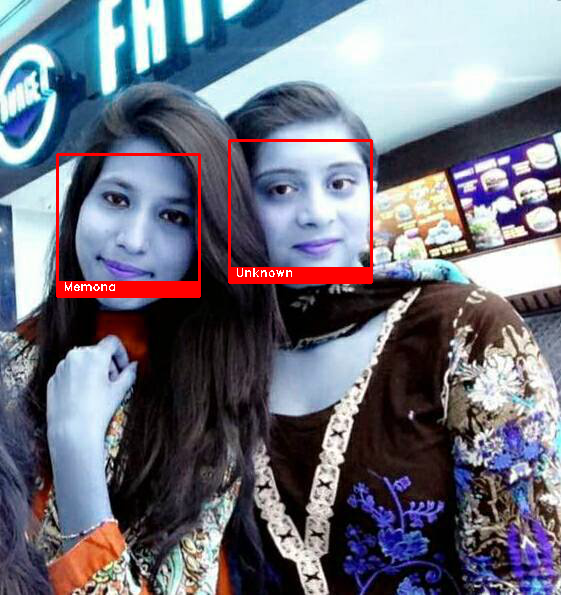

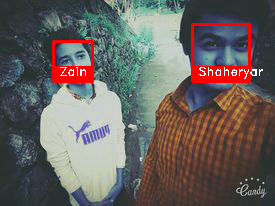

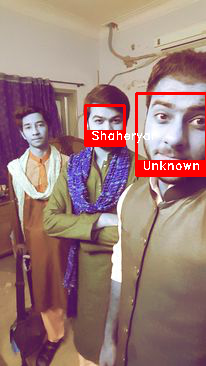

In [ ]:
for img in recognized_frames:
  cv2_imshow(img)

#Emotion Classification